In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import json


df_data = pd.read_csv('../data/ogd104_stromproduktion_swissgrid.csv', sep=',', decimal='.', thousands="'")
display(df_data.head())
df_data['Datum'] = pd.to_datetime(df_data['Datum'])
df_data['Year'] = df_data['Datum'].dt.year

display(df_data.head())

,Datum,Energietraeger,Produktion_GWh
0,2014-01-01,Flusskraft,26.1
1,2014-01-01,Kernkraft,80.1
2,2014-01-01,Speicherkraft,23.3
3,2014-01-01,Thermische,10.3
4,2014-01-02,Flusskraft,26.0


,Datum,Energietraeger,Produktion_GWh,Year
0,2014-01-01,Flusskraft,26.1,2014
1,2014-01-01,Kernkraft,80.1,2014
2,2014-01-01,Speicherkraft,23.3,2014
3,2014-01-01,Thermische,10.3,2014
4,2014-01-02,Flusskraft,26.0,2014


In [15]:
rename_mapping = {
    'Flusskraft': 'Hydropower',
    'Kernkraft': 'Nuclear',
    'Speicherkraft': 'Storage Power',
    'Thermische': 'Thermal'
}

# Replace the values in the 'Energietraeger' column
df_data['Energietraeger'] = df_data['Energietraeger'].replace(rename_mapping)


In [16]:
grouped_data = df_data.groupby(['Year', 'Energietraeger'])['Produktion_GWh'].sum().reset_index()
display(grouped_data.head())
pivot_data = grouped_data.pivot(index='Year', columns='Energietraeger', values='Produktion_GWh')
display(pivot_data.head())

,Year,Energietraeger,Produktion_GWh
0,2014,Hydropower,17237.7
1,2014,Nuclear,26439.9
2,2014,Storage Power,20803.9
3,2014,Thermal,3660.6
4,2015,Hydropower,16594.0


Energietraeger,Hydropower,Nuclear,Photovoltaik,Storage Power,Thermal,Wind
Year,,,,,,
2014,17237.7,26439.9,NaN,20803.9,3660.6,NaN
2015,16594.0,22155.9,997.4,21754.1,3660.6,62.2
2016,16572.4,20255.7,1199.8,19361.2,3671.4,62.9
2017,15931.8,19523.0,1464.5,20546.9,3660.6,72.3
2018,16904.9,24445.7,1669.2,21453.4,3660.6,73.2


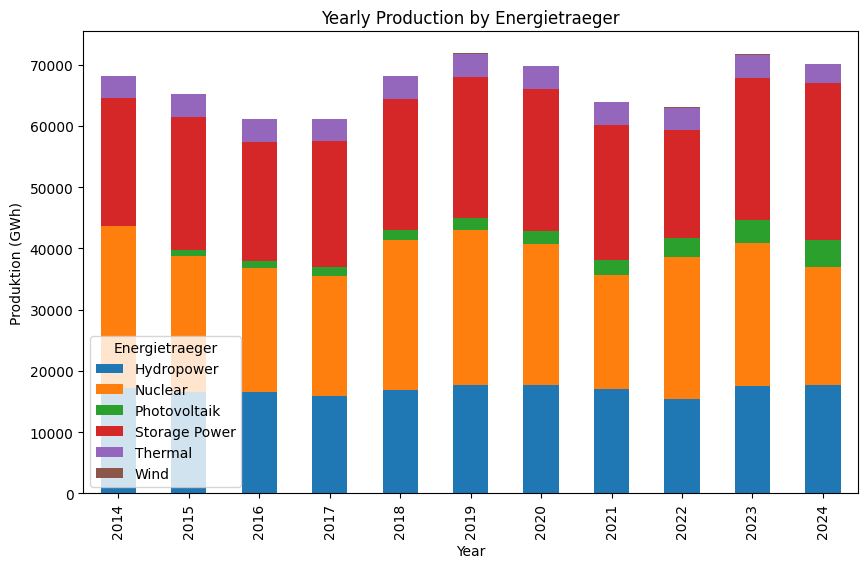

In [17]:
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Produktion (GWh)')
plt.title('Yearly Production by Energietraeger')
plt.legend(title='Energietraeger')
plt.show()

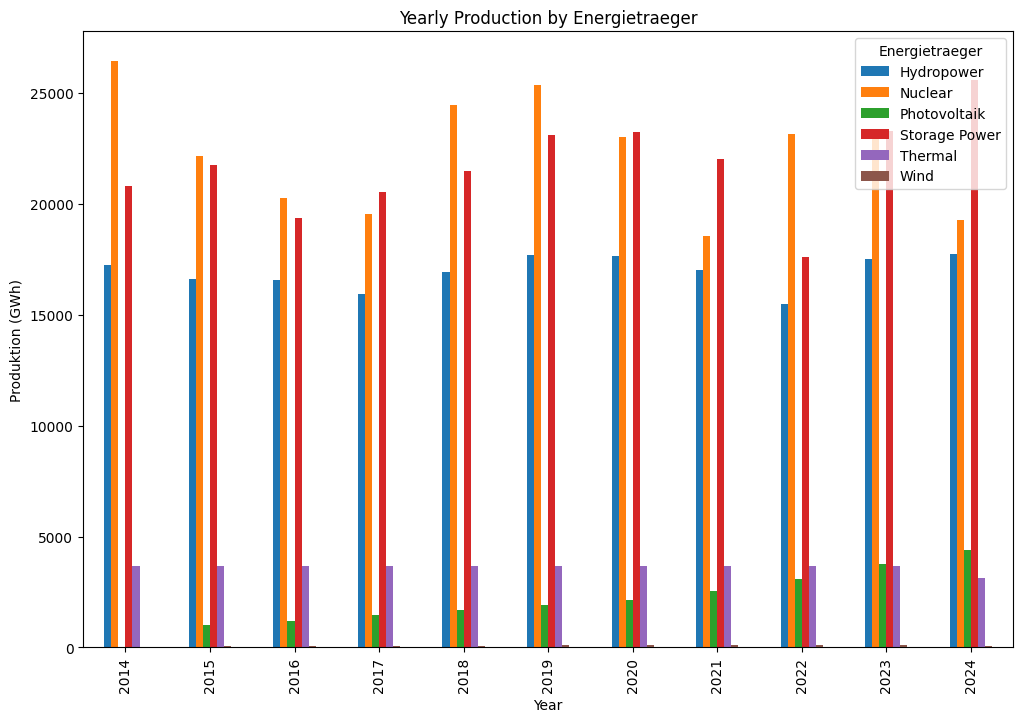

In [18]:
# Plot the data
pivot_data.plot(kind='bar', figsize=(12, 8))

plt.xlabel('Year')
plt.ylabel('Produktion (GWh)')
plt.title('Yearly Production by Energietraeger')
plt.legend(title='Energietraeger')
plt.show()

In [19]:
highcharts_series = []
for column in pivot_data.columns:
    series_data = {
        'name': column,
        'data': pivot_data[column].fillna(0).tolist()  # Replace NaN with 0 for Highcharts
    }
    highcharts_series.append(series_data)
    
print(json.dumps(highcharts_series, indent=2))
with open('../public/data/stromproduktion_swissgrid.json', 'w') as json_file:
    json.dump(highcharts_series, json_file, indent=2)

[
  {
    "name": "Hydropower",
    "data": [
      17237.7,
      16594.0,
      16572.4,
      15931.8,
      16904.9,
      17693.9,
      17647.0,
      17032.2,
      15463.2,
      17485.3,
      17719.4
    ]
  },
  {
    "name": "Nuclear",
    "data": [
      26439.9,
      22155.9,
      20255.7,
      19523.0,
      24445.7,
      25331.5,
      23027.3,
      18565.9,
      23162.5,
      23374.6,
      19243.0
    ]
  },
  {
    "name": "Photovoltaik",
    "data": [
      0.0,
      997.4,
      1199.8,
      1464.5,
      1669.2,
      1919.2,
      2118.9,
      2542.8,
      3066.3,
      3773.4,
      4398.9
    ]
  },
  {
    "name": "Storage Power",
    "data": [
      20803.9,
      21754.1,
      19361.2,
      20546.9,
      21453.4,
      23108.7,
      23246.8,
      22035.4,
      17614.4,
      23274.5,
      25585.5
    ]
  },
  {
    "name": "Thermal",
    "data": [
      3660.6,
      3660.6,
      3671.4,
      3660.6,
      3660.6,
      3660.6,
      3671